In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
pd.set_option('precision',2)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

In [2]:
columns = ["user_id","order_date","order_num","money"]
df_origin = pd.read_table('CDNOW.txt',sep='\s+',header=None,names=columns)
df_origin.head(10)

,user_id,order_date,order_num,money
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33


In [3]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id       69659 non-null int64
order_date    69659 non-null int64
order_num     69659 non-null int64
money         69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


# 一、商品销售静态分析

## 1、各订单购买数量分析

- 分析订单总数量、单个订单购买商品最大数量、单个订单购买最小数量、均订单购买商品数量，具体如下

In [4]:
df_origin.order_num.describe()

count    69659.00
mean         2.41
std          2.33
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         99.00
Name: order_num, dtype: float64

In [5]:
# 打印需要的分析数据
order_nums, mean_order_num,_ , min_order_num ,_,_,_, max_order_num= df_origin.order_num.describe()
result = {'统计项':['订单总数量','单个订单购买商品最大数量','单个订单购买最小数量','订单平均购买商品数量'],
                      '统计结果':[order_nums, max_order_num, min_order_num, mean_order_num]}
result = pd.DataFrame(result,index=range(4))
result[['统计项','统计结果']]
# result.info()

,统计项,统计结果
0,订单总数量,69659.00
1,单个订单购买商品最大数量,99.00
2,单个订单购买最小数量,1.00
3,订单平均购买商品数量,2.41


- 分析订单总金额、单个订单最大金额、单个订单最小金额、均订单购买金额，具体如下

In [6]:
# pd.set_option('precision',2)
import math
pd.set_option('precision', 2)
_, mean_order_monies,_ , min_order_monies ,_,_,_, max_order_monies= df_origin.money.describe()
order_monies = df_origin.money.agg(sum)

print('订单总金额:',order_monies.round(2))
print('单个订单购买商品最大金额:',max_order_monies)
print('单个订单购买最小金额:',min_order_monies)
print('订单平均购买商品金额:',"%.2f"%mean_order_monies)


订单总金额: 2500315.63
单个订单购买商品最大金额: 1286.01
单个订单购买最小金额: 0.0
订单平均购买商品金额: 35.89


# 二、商品销售动态分析

## 1、订单数量趋势分析

In [7]:
# 时间序列分析
df_origin['dt'] = pd.to_datetime(df_origin['order_date'],format='%Y%m%d')
df_origin.head()

,user_id,order_date,order_num,money,dt
0,1,19970101,1,11.77,1997-01-01
1,2,19970112,1,12.00,1997-01-12
2,2,19970112,5,77.00,1997-01-12
3,3,19970102,2,20.76,1997-01-02
4,3,19970330,2,20.76,1997-03-30


In [8]:
# 根据dt字段聚合数据
grouped = df_origin.groupby('dt')
order_counts_by_dt = grouped.order_date.count()
order_counts_by_dt.head()

dt
1997-01-01    212
1997-01-02    247
1997-01-03    236
1997-01-04    178
1997-01-05    256
Name: order_date, dtype: int64

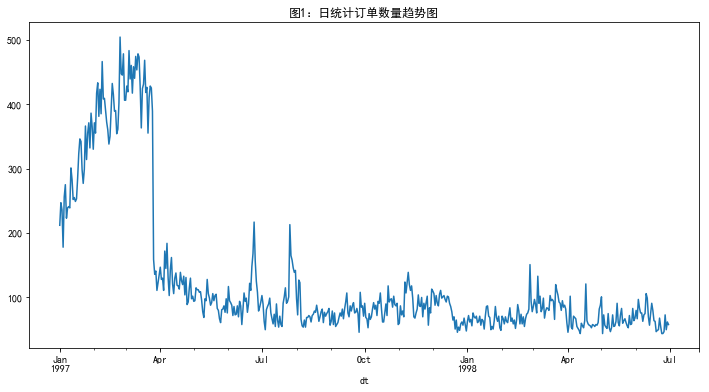

In [9]:
# 订单数量趋势图
order_counts_by_dt.plot(figsize=(12,6),title='图1：日统计订单数量趋势图')

In [10]:
# 计算出日均订单数量，最高订单数量及时间戳，日最低订单数量及时间戳
from datetime import datetime

print('日均订单数量:%.2f'%order_counts_by_dt.mean())
print('日最高订单数量:%d,到达时间:%s'%(order_counts_by_dt.max(),datetime.date((order_counts_by_dt.idxmax()))))
print('日最低订单数量:%d,到达时间:%s'%(order_counts_by_dt.min(),datetime.date((order_counts_by_dt.idxmin()))))

日均订单数量:127.58
日最高订单数量:504,到达时间:1997-02-24
日最低订单数量:44,到达时间:1998-04-12


结语：日订单数量整体呈下降趋势，其中日订单数量在1997年2月24日到达顶峰，在1998年4月12日到达最低谷。

## 2、订单金额趋势分析

日均订单金额:4579.33
日最高订单金额:17440,到达时间:1997-03-18
日最低订单金额:1119,到达时间:1997-12-23


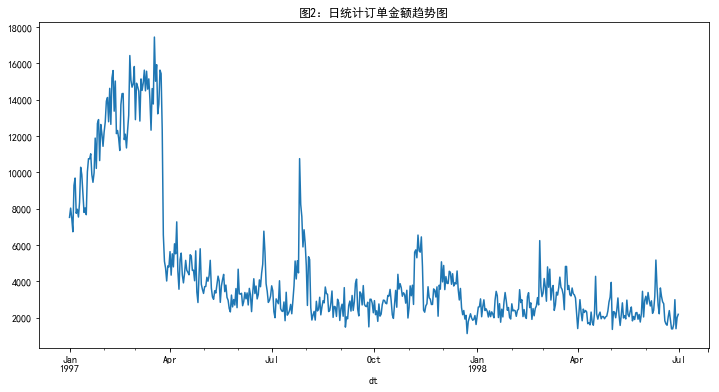

In [11]:
# 计算出日均订单数量，最高订单数量及时间戳，日最低订单数量及时间戳
from datetime import datetime
order_monies_by_dt = grouped.money.sum()
print('日均订单金额:%.2f'%order_monies_by_dt.mean())
print('日最高订单金额:%d,到达时间:%s'%(order_monies_by_dt.max(),datetime.date((order_monies_by_dt.idxmax()))))
print('日最低订单金额:%d,到达时间:%s'%(order_monies_by_dt.min(),datetime.date((order_monies_by_dt.idxmin()))))
order_monies_by_dt.plot(figsize=(12,6),title='图2：日统计订单金额趋势图')

## 3、异常值检测？

- 没有空值和null值

In [12]:
df_origin.isna().any()

user_id       False
order_date    False
order_num     False
money         False
dt            False
dtype: bool

In [13]:
df_origin.isnull().any()

user_id       False
order_date    False
order_num     False
money         False
dt            False
dtype: bool

- 购买金额为0判定为无效订单

In [14]:
df_origin = df_origin[df_origin.money!=0]
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69579 entries, 0 to 69658
Data columns (total 5 columns):
user_id       69579 non-null int64
order_date    69579 non-null int64
order_num     69579 non-null int64
money         69579 non-null float64
dt            69579 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 3.2 MB


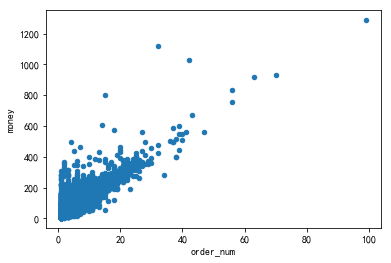

In [15]:
# 散点图看订单特征分布
df_origin.plot.scatter('order_num','money')

订单分布比较集中，且特征之间规律性较强，没有异常值。

# 三、用户消费行为静态分析

## 1、各用户购买数量分析

In [314]:
# 按照用户聚合
df_origin = pd.read_table('CDNOW.txt',sep='\s+',header=None,names=columns)
df_cleaned = df_origin[df_origin.money>0].reindex()
group_by_user = df_cleaned.groupby('user_id')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69579 entries, 0 to 69658
Data columns (total 4 columns):
user_id       69579 non-null int64
order_date    69579 non-null int64
order_num     69579 non-null int64
money         69579 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.7 MB


- 各用户累计购买数量分析

In [17]:
group_by_user.order_num.sum().describe()

count    23502.00
mean         7.14
std         17.00
min          1.00
25%          1.00
50%          3.00
75%          7.00
max       1033.00
Name: order_num, dtype: float64

分析：共计有效用户23502个（之前异常检测去掉了金额为0的无效订单），单用户最大购买量1033件，单用户最少购买量1件，均用户购买7件。以下为购买量前10的用户

In [18]:
group_by_user.order_num.sum().sort_values(ascending=False).head(10)

user_id
14048    1033
7592      917
7983      536
7931      514
19339     378
22279     330
499       328
6569      322
3049      301
16517     299
Name: order_num, dtype: int64

- 各用户购买数量累计贡献分析

In [19]:
# 统计多少用户贡献了多少购买量？以占比的形式
def order_ratio_by_user(df,n,flag=False):
    n = int(df.count()*n/100)
    df_in = df.sort_values(ascending=flag).head(n)
    ratio = df_in.sum() / df.sum()
    return ratio

In [20]:
order_nums_by_user = group_by_user.order_num.sum()
for i in range(1,9):
    print("按照购买量由多到少，前百分之%d用户贡献了约百分之%.2f的订单出货量"%
          (10*i,order_ratio_by_user(order_nums_by_user,10*i)*100))

按照购买量由多到少，前百分之10用户贡献了约百分之50.76的订单出货量
按照购买量由多到少，前百分之20用户贡献了约百分之67.70的订单出货量
按照购买量由多到少，前百分之30用户贡献了约百分之77.82的订单出货量
按照购买量由多到少，前百分之40用户贡献了约百分之84.57的订单出货量
按照购买量由多到少，前百分之50用户贡献了约百分之89.37的订单出货量
按照购买量由多到少，前百分之60用户贡献了约百分之92.81的订单出货量
按照购买量由多到少，前百分之70用户贡献了约百分之95.62的订单出货量
按照购买量由多到少，前百分之80用户贡献了约百分之97.20的订单出货量


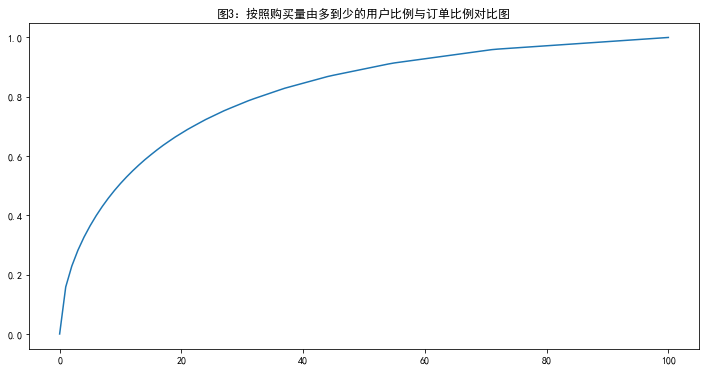

In [21]:
data_image1 = pd.Series([order_ratio_by_user(order_nums_by_user,i) for i in range(101)])
data_image1.plot(figsize=(12,6),title="图3：按照购买量由多到少的用户比例与订单比例对比图")

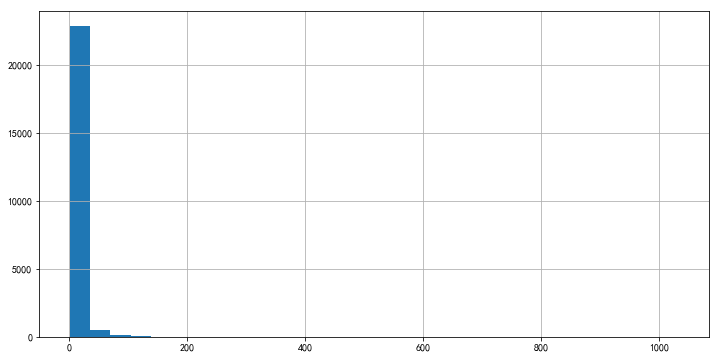

In [22]:
# hist图,栅栏分析，x轴数据等分统计
order_nums_by_user.hist(figsize=(12,6),bins=30)

分析：绝大多数用户分布在购买量较少的区间内，高购买量用户非常少

- 各用户最大单笔购买数量分析

In [23]:
df_cleaned.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            69649, 69650, 69651, 69652, 69653, 69654, 69655, 69656, 69657,
            69658],
           dtype='int64', length=69579)

In [24]:
# 取出各用户最大订单索引
max_idexer = group_by_user.order_num.idxmax()

max_idexer[:5]

user_id
1     0
2     2
3     6
4     9
5    21
Name: order_num, dtype: int64

In [25]:
# 根据索引检索出相关订单信息

df_origin.take(max_idexer).head()

,user_id,order_date,order_num,money
0,1,19970101,1,11.77
2,2,19970112,5,77.00
6,3,19971115,5,57.45
9,4,19970101,2,29.33
21,5,19971208,4,46.46


In [26]:
# 单笔订单最大的前10用户明细
df_origin.take(max_idexer).sort_values(by='order_num',ascending=False).head(10)

,user_id,order_date,order_num,money
27632,8830,19980610,99,1286.01
69416,23474,19970607,70,932.23
65950,22279,19970726,63,915.10
26686,8529,19970228,56,756.47
23565,7592,19970203,47,563.59
32495,10550,19970303,43,669.93
45314,14894,19970225,42,1028.51
4425,1412,19970818,41,558.09
45593,15003,19970223,40,506.97
46359,15238,19970324,39,544.83


## 2、各用户购买金额分析分析

- 各用户累计购买金额分析

In [27]:
group_by_user.money.sum().describe()

count    23502.00
mean       106.39
std        241.21
min          3.99
25%         19.99
50%         43.60
75%        106.97
max      13990.93
Name: money, dtype: float64

- 分析：共计用户23502个(去掉购买金额为0的无效工单)，单用户最大购买金额13990.93$，单用户最少购买金额3.99$，均用户购买106.39$。以下为购买量前10的用户

In [28]:
group_by_user.money.sum().sort_values(ascending=False).head(10)

user_id
7592     13990.93
14048     8976.33
7983      6973.07
19339     6552.70
7931      6497.18
6569      4968.00
22279     4490.64
499       4378.55
3049      4262.85
15162     4234.45
Name: money, dtype: float64

- 各用户购买金额累计贡献分析

In [29]:
# 定义按高低顺序，若干占比用户的消费占比，使用上面定义好的函数
# def order_ratio_by_user(df,n,flag=False):
#     n = int(df.count()*n/100)
#     df_in = df.sort_values(ascending=flag).head(n)
#     ratio = df_in.sum() / df.sum()
#     return ratio
order_monies_by_user = group_by_user.money.sum()
for i in range(1,9):
    print("按照购买金额由多到少，前百分之%d用户贡献了约百分之%.2f的消费额度"%
          (10*i,order_ratio_by_user(order_monies_by_user,10*i)*100))

按照购买金额由多到少，前百分之10用户贡献了约百分之50.87的消费额度
按照购买金额由多到少，前百分之20用户贡献了约百分之67.70的消费额度
按照购买金额由多到少，前百分之30用户贡献了约百分之77.88的消费额度
按照购买金额由多到少，前百分之40用户贡献了约百分之84.69的消费额度
按照购买金额由多到少，前百分之50用户贡献了约百分之89.53的消费额度
按照购买金额由多到少，前百分之60用户贡献了约百分之93.09的消费额度
按照购买金额由多到少，前百分之70用户贡献了约百分之95.74的消费额度
按照购买金额由多到少，前百分之80用户贡献了约百分之97.62的消费额度


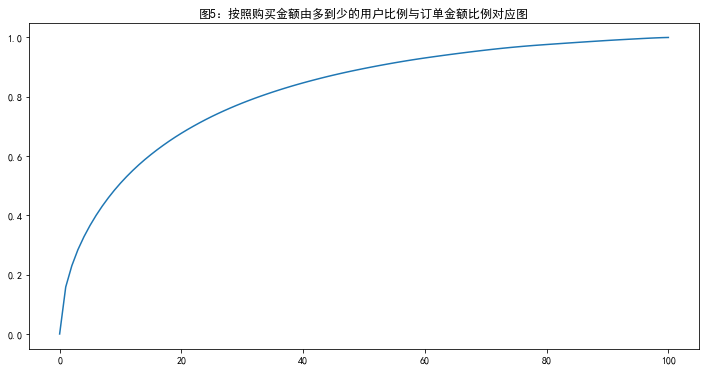

In [30]:
data_image2 = pd.Series([order_ratio_by_user(order_monies_by_user,i) for i in range(101)])
data_image2.plot(figsize=(12,6),title="图5：按照购买金额由多到少的用户比例与订单金额比例对应图")

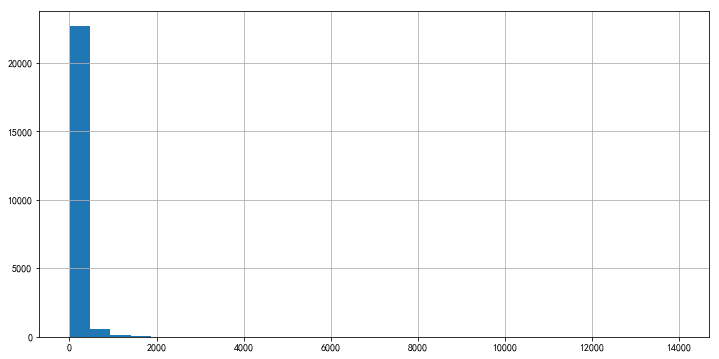

In [31]:
# hist图,栅栏分析，
order_monies_by_user.hist(figsize=(12,6),bins=30)

分析:大多数用户购买金额分布在比较小的几个区间内，高购买金额的用户非常少。

- 各用户最大单笔小芬金额分析

In [32]:
# 取出各用户最大金额订单索引
max_money_idexer = group_by_user.money.idxmax()

max_money_idexer[:5]

user_id
1     0
2     2
3     6
4    10
5    21
Name: money, dtype: int64

In [33]:
# 根据索引检索出相关订单信息
df_max_money = df_origin.take(max_money_idexer)
df_max_money.head()

,user_id,order_date,order_num,money
0,1,19970101,1,11.77
2,2,19970112,5,77.00
6,3,19971115,5,57.45
10,4,19970118,2,29.73
21,5,19971208,4,46.46


In [34]:
# 单笔订单金额最大的前10用户明细
df_max_money.sort_values(by='money',ascending=False).head(10)

,user_id,order_date,order_num,money
27632,8830,19980610,99,1286.01
56479,18847,19970307,32,1119.68
45314,14894,19970225,42,1028.51
69416,23474,19970607,70,932.23
65950,22279,19970726,63,915.10
26686,8529,19970228,56,756.47
32495,10550,19970303,43,669.93
37453,12304,19970217,14,606.55
11428,3537,19971107,39,597.61
31606,10197,19980610,37,587.63


## 3、各用户购买次数分析

In [35]:
order_counts_by_user = df_cleaned.groupby('user_id').size()

- 购买次数前10多的用户

In [36]:
order_counts_by_user.sort_values(ascending=False).head(10)

user_id
14048    217
7592     201
7983     149
22061    143
3049     117
499      110
19597    109
7145     102
2484      80
10079     67
dtype: int64

In [37]:
order_counts_by_user.describe()

count    23502.00
mean         2.96
std          4.74
min          1.00
25%          1.00
50%          1.00
75%          3.00
max        217.00
dtype: float64

分析:23502个有效用户，均用户订单数量2.96个，单用户最大订单数量217个、最小订单数量1个。

# 四、用户消费行为动态分析

## 1、各用户第一次和最后一次购买时间分析

In [38]:
df_cleaned.sort_values(by='order_date').tail()

,user_id,order_date,order_num,money
29150,9359,19980630,1,18.49
61868,20815,19980630,4,53.46
19045,6042,19980630,4,77.15
4961,1593,19980630,3,41.99
13880,4358,19980630,4,56.44


In [39]:
df_cleaned['dt'] = pd.to_datetime(df_cleaned.order_date,format='%Y%m%d')
df_cleaned.head()

,user_id,order_date,order_num,money,dt
0,1,19970101,1,11.77,1997-01-01
1,2,19970112,1,12.00,1997-01-12
2,2,19970112,5,77.00,1997-01-12
3,3,19970102,2,20.76,1997-01-02
4,3,19970330,2,20.76,1997-03-30


In [40]:
user_max_dt = df_cleaned.groupby('user_id').order_date.idxmax()
user_min_dt = df_cleaned.groupby('user_id').order_date.idxmin()

In [41]:
# 用户第一次购买时间
df_origin['dt']=pd.to_datetime(df_origin.order_date,format='%Y%m%d')
first_order = df_origin.take(user_min_dt)
first_order.head()

,user_id,order_date,order_num,money,dt
0,1,19970101,1,11.77,1997-01-01
1,2,19970112,1,12.00,1997-01-12
3,3,19970102,2,20.76,1997-01-02
9,4,19970101,2,29.33,1997-01-01
13,5,19970101,2,29.33,1997-01-01


In [42]:
# 用户最后一次购买时间
last_order = df_origin.take(user_max_dt)
last_order.head()

,user_id,order_date,order_num,money,dt
0,1,19970101,1,11.77,1997-01-01
1,2,19970112,1,12.00,1997-01-12
8,3,19980528,1,16.99,1998-05-28
12,4,19971212,2,26.48,1997-12-12
23,5,19980103,3,37.47,1998-01-03


## 2、各用户最后一次消费与当前时间间隔
注：当前时间统一用原始数据中最后1次时间，即1998-06-30

In [43]:
now = datetime.strptime('1998-06-30',"%Y-%m-%d")

In [44]:
last_order.loc[:,'now_diff_dt'] = now - last_order.dt
last_order.head()

d:\python35\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
d:\python35\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,user_id,order_date,order_num,money,dt,now_diff_dt
0,1,19970101,1,11.77,1997-01-01,545 days
1,2,19970112,1,12.00,1997-01-12,534 days
8,3,19980528,1,16.99,1998-05-28,33 days
12,4,19971212,2,26.48,1997-12-12,200 days
23,5,19980103,3,37.47,1998-01-03,178 days


## 3、各用户生命周期分析

In [45]:
# 使用用户user_od做为索引
last_order.set_index('user_id',inplace=True)
first_order.set_index('user_id',inplace=True)

In [46]:
last_order.head()

,order_date,order_num,money,dt,now_diff_dt
user_id,,,,,
1,19970101,1,11.77,1997-01-01,545 days
2,19970112,1,12.00,1997-01-12,534 days
3,19980528,1,16.99,1998-05-28,33 days
4,19971212,2,26.48,1997-12-12,200 days
5,19980103,3,37.47,1998-01-03,178 days


In [47]:
first_order.head()

,order_date,order_num,money,dt
user_id,,,,
1,19970101,1,11.77,1997-01-01
2,19970112,1,12.00,1997-01-12
3,19970102,2,20.76,1997-01-02
4,19970101,2,29.33,1997-01-01
5,19970101,2,29.33,1997-01-01


In [48]:
last_order['ttl'] = last_order.dt - first_order.dt
last_order.head()

d:\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,order_date,order_num,money,dt,now_diff_dt,ttl
user_id,,,,,,
1,19970101,1,11.77,1997-01-01,545 days,0 days
2,19970112,1,12.00,1997-01-12,534 days,0 days
3,19980528,1,16.99,1998-05-28,33 days,511 days
4,19971212,2,26.48,1997-12-12,200 days,345 days
5,19980103,3,37.47,1998-01-03,178 days,367 days


计算出生命周期来（time to live）

In [49]:
last_order.ttl.astype(str)
ttl = last_order.ttl/np.timedelta64(1,'D')
ttl.head()

user_id
1      0.0
2      0.0
3    511.0
4    345.0
5    367.0
Name: ttl, dtype: float64

In [50]:
ttl_data = ttl[ttl>0]
ttl_data.head()

user_id
3    511.0
4    345.0
5    367.0
7    445.0
8    452.0
Name: ttl, dtype: float64

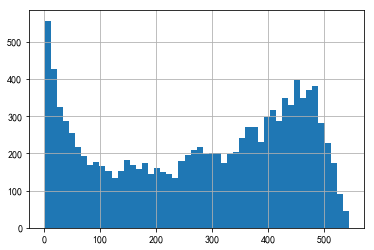

In [51]:
ttl_data.hist(bins=50)

- 忠诚用户生命周期在300天之上。50天以下的用户也比较集中。
- 双峰图。

## 4、各用户首次回购周期

- 取前两次消费记录

In [285]:
# gg = df_cleaned.groupby('user_id')['dt'].value_counts().rename('count').reset_index()
df_cleaned.sort_values(['user_id','dt'],ascending=[1,1],inplace=True)
gg = df_cleaned.groupby('user_id').head(2)
grouped1 = gg.groupby('user_id').dt
# grouped = grouped[grouped.size()>1]
bool_choice1 = grouped1.size() > 1
res1 = (grouped1.max()[bool_choice1]-grouped1.min()[bool_choice1]) / grouped1.size()[bool_choice1]
res1.head()

user_id
2     0 days 00:00:00
3    43 days 12:00:00
4     8 days 12:00:00
5     6 days 12:00:00
7   141 days 12:00:00
Name: dt, dtype: timedelta64[ns]

In [286]:
res1.mean()

Timedelta('54 days 04:36:13.771335')

## 5、各用户平均购买周期

In [287]:
grouped = df_cleaned.sort_values(by='dt').groupby('user_id').dt
# grouped = grouped[grouped.size()>1]
bool_choice = grouped.size() > 1
res = (grouped.max()[bool_choice]-grouped.min()[bool_choice]) / grouped.size()[bool_choice]
# print(res)
res.head()

user_id
2           0 days 00:00:00
3          85 days 04:00:00
4          86 days 06:00:00
5   33 days 08:43:38.181818
7         148 days 08:00:00
Name: dt, dtype: timedelta64[ns]

In [288]:
res.mean()

Timedelta('69 days 23:41:08.058687')

In [ ]:
# # # print(grouped.dt-grouped.dt.shift[-1])
# def buy_back(g,n = g[1].shape[0]):     
#     if g[1].shape[0] < 2:
#         dif = pd.to_timedelta(0)
#     else:
#         dif = g[1].sort_values()[1:n].values-g[1].sort_values()[:-1].values    
#         dif = pd.to_timedelta(dif.mean())
    
#     return dif
# # for g in grouped:
# # #     print(g[1]-g[1].shift(-1))
# # #     print(type(g))
# #     dif = g[1]-g[1].shift(-1)
# #     g = (g[0],dif)
# #     print(g)
# res = [buy_back(g,n=2) for g in grouped]    
# def buy_back(g): 
#     dif = g[1]-g[1].shift(-1)
#     g = (g[0],dif)    
#     return g
# res 

In [ ]:
# user_pivot = df_cleaned.pivot_table(index=['user_id','dt'],values="order_date",aggfunc='count')
# t = user_pivot.reset_index()
# # user_pivot.index
# t.head()

In [ ]:
# def buy_back(g): 
#     dif = g.dt-g.dt.shift(-1)
    
#     return dif
# t = t.set_index('user_id')
# t.head()

## 6、各用户月复购率

In [289]:
df_cleaned.head()

,user_id,order_date,order_num,money,dt
0,1,19970101,1,11.77,1997-01-01
1,2,19970112,1,12.00,1997-01-12
2,2,19970112,5,77.00,1997-01-12
3,3,19970102,2,20.76,1997-01-02
4,3,19970330,2,20.76,1997-03-30


- 增加月份列

In [356]:
# df_cleaned['month'] = df_cleaned.order_date.values.astype('datetime64[M]')
# print(df_cleaned.head())
df_cleaned['dt'] = pd.to_datetime(df_cleaned.order_date,format='%Y%m%d')
# help(pd.to_datetime)
df_cleaned['month'] =  df_cleaned.set_index('dt').index.to_period('M')
df_cleaned.head()

,user_id,order_date,order_num,money,dt,month
0,1,19970101,1,11.77,1997-01-01,1997-01
1,2,19970112,1,12.00,1997-01-12,1997-01
2,2,19970112,5,77.00,1997-01-12,1997-01
3,3,19970102,2,20.76,1997-01-02,1997-01
4,3,19970330,2,20.76,1997-03-30,1997-03


- 各月复购率

In [385]:
# 透视
repeat_pivot = df_cleaned.pivot_table(index=['month'],columns='user_id',values='dt',aggfunc='count')
repeat_pivot.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
month,,,,,,,,,,,,,,,,,,,,,
1997-01,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-03,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
1997-04,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1997-05,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [386]:
# axis=1轴上计算
repeat_ratio = repeat_pivot.apply(lambda x:x[x>1].count()/(x.count()-x[x.isnull()].count()),axis=1)
repeat_ratio

month
1997-01    0.11
1997-02    0.12
1997-03    0.16
1997-04    0.22
1997-05    0.20
1997-06    0.20
1997-07    0.22
1997-08    0.20
1997-09    0.20
1997-10    0.21
1997-11    0.20
1997-12    0.22
1998-01    0.21
1998-02    0.20
1998-03    0.23
1998-04    0.20
1998-05    0.20
1998-06    0.21
Freq: M, dtype: float64

- 复购率趋势图

## 7、各月回购率

In [463]:
# temp = repeat_pivot['1997-01'].values + repeat_pivot['1997-02'].values
# print(type(temp))
# pd.Series(temp)
# pd.Series(temp[0]).isnull()
ratio_list = []
for i in range(repeat_pivot.shape[0]-1):
    temp = repeat_pivot.iloc[i,:] + repeat_pivot.iloc[1+i,:]
    up_data = temp[temp!=np.nan].count()
    down_data = repeat_pivot.iloc[i,:][repeat_pivot.iloc[i,:]!=np.nan].count()
    ratio = up_data / down_data
    ratio_list.append(ratio)
#     print(type(up_data))
#     print(temp[temp!=np.nan].count()/repeat_pivot.iloc[i,:][repeat_pivot.iloc[i,:]!=np.nan].count())
    
# print(ratio)
back_ratio = pd.Series(ratio_list,index=repeat_ratio.index[:17])
back_ratio

month
1997-01    0.15
1997-02    0.17
1997-03    0.19
1997-04    0.30
1997-05    0.34
1997-06    0.32
1997-07    0.28
1997-08    0.30
1997-09    0.31
1997-10    0.34
1997-11    0.31
1997-12    0.27
1998-01    0.31
1998-02    0.37
1998-03    0.25
1998-04    0.32
1998-05    0.30
Freq: M, dtype: float64

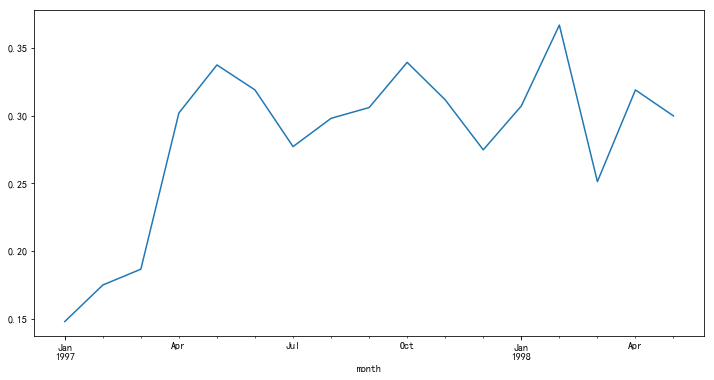

In [464]:
back_ratio.plot(figsize=(12,6))